# Introduction to Data Visualization
Data visualization is the process of presenting data in a graphical format.  It's a crucial aspect of data science because it bridges the gap between technical analysis and decision-making, allowing complex information to be communicated effectively.  Visualizations make it easier to understand patterns, trends, and outliers than raw data alone.

We should use data visualization to:

* **Explore Data (Exploratory Data Analysis - EDA):** Gain initial insights, identify relationships, and formulate hypotheses.
* **Communicate Findings:** Present results clearly and persuasively to both technical and non-technical audiences.
* **Support Decision-Making:** Provide visual evidence to guide strategic choices.
* **Enhance Understanding:**  Transform complex data into an accessible and intuitive format.
* **Tell Story:** Convey information in a way stakeholders can easily understand.

### Important Considerations
* **Purpose**: What's the question you're trying to answer? What story does the data tell?
* **Audience**: To whom you are presenting?
* **Simplicity**: Aim for the *simplest* visualization that effectively conveys the information. Avoid unnecessary complexity.  "Pretty" isn't the goal; clarity is.

**Important:** Sometimes simple statistics (mean, etc.) are sufficient; visualizations are not *always* needed.

---

## Scatter Plots
Scatter plots allow us to visualize the relationship between *two* (usually continuous) numerical variables. Each point represents a pair of values (x, y).

We use scatter plots to:

* Identify Correlations (_Do the variables tend to increase or decrease together?_)
* Detect Clusters  (_Are there groups of data points that are similar to each other?_)
* Find Outliers (_Are there any data points that are far away from the general trend?_)

### Key Features and Customizations  
* **Trend Lines:** Adding a regression line (often a linear regression) can highlight the overall trend. The easiest way to do so is by using `sns.regplot`.
* **Transparency:** Making points semi-transparent (using the parameter `alpha`) helps visualize areas with many overlapping points.
* **Color:** `hue` parameter allows us to use color to represent a third, categorical variable.
* **Shape:** `style` parameter allows us to use different marker shapes to represent another categorical variable.
* **Size:** `size` parameter allows us to use the size of the points to represent a third, *numerical* variable (less common, can be harder to interpret).

**Important:** Using too many features with additional parameters might make the plot busy easily.

### Example Dataset
Let's use the `tips` dataset (Total bill vs. Tip amount, with additional features like sex, smoker status, day, time, and party size) from the Seaborn library.

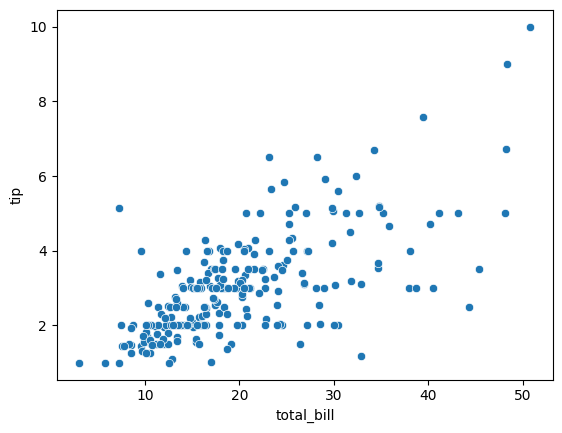

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")  # Load the built-in example dataset

# Basic scatter plot
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

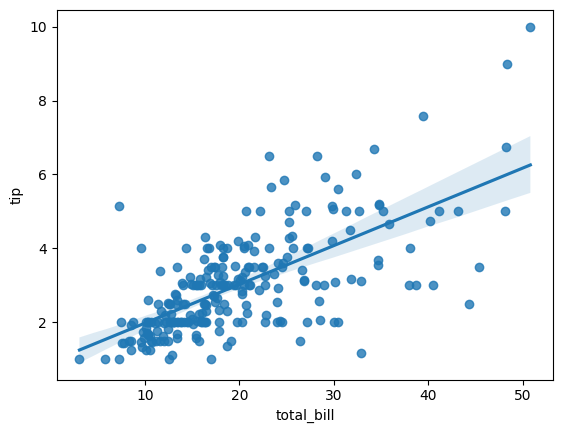

In [2]:
# Add a trend line (using seaborn's regplot for convenience)
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

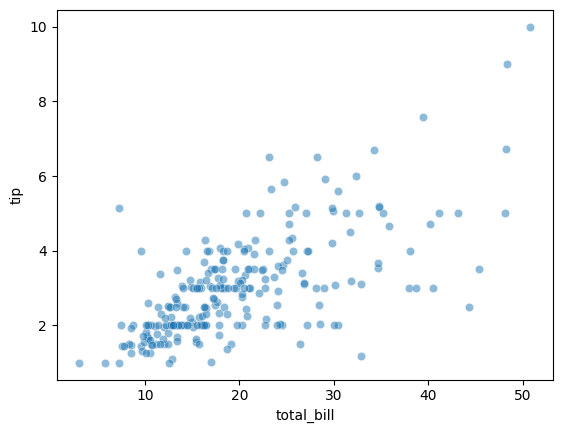

In [3]:
# Add transparency (alpha) to handle overplotting
sns.scatterplot(x="total_bill", y="tip", data=tips, alpha=0.5) #alpha is transparency
plt.show()

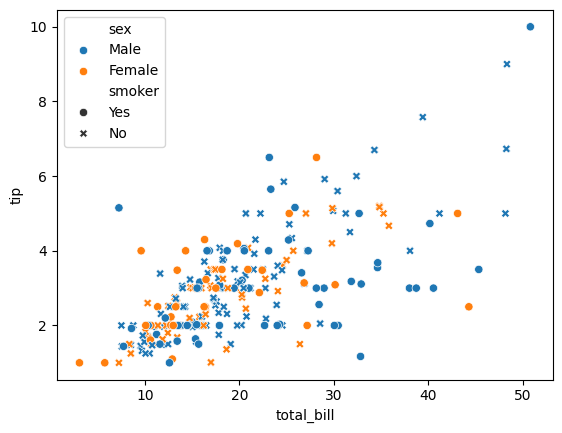

In [4]:
# Add more variables using color (hue) and shape (style)
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex", style="smoker")
plt.show()

***

## Line Plots

